In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import os



# Load Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/AI/plantdoc_dataset.zip

In [ ]:
!unzip /content/drive/MyDrive/AI/balanced_dataset.zip

In [ ]:
!find . -name '*mold*' -exec rm -rf {} \;

find: ‘./plantdoc_dataset/diseases/test/Tomato___mold_leaf’: No such file or directory
find: ‘./plantdoc_dataset/diseases/train/Tomato___mold_leaf’: No such file or directory


In [ ]:
cd plantdoc_dataset

/content/plantdoc_dataset


In [ ]:
cd balanced_dataset

/content/balanced_dataset


In [ ]:
ls -l

total 8
drwxrwxrwx 4 root root 4096 May 15 12:47 classes/
drwxrwxrwx 4 root root 4096 May 15 12:47 diseases/


In [ ]:
directories = ['train', 'valid']

train_count = 0
valid_count = 0
for d in directories:
    for dir, _, photos in os.walk(os.path.join('./diseases', d)):
        if '/train/' in dir:
            train_count += len(photos)
        elif '/valid/' in dir:
            valid_count += len(photos)

print(train_count, valid_count)
# 1445 164 164

20800 5200


In [ ]:
import os
from PIL import Image

root_dir = "./diseases"
folders = ["train", "valid"]
print("starting...")
plant_labels = ['Apple', 'Corn_(maize)', 'Grape', 'Potato', 'Strawberry', 'Tomato']
diseases_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust',
                   'Apple___healthy', 'Corn_(maize)___Common_rust_',
                   'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy',
                   'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
                   'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy',
                   'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy',
                   'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot',
                   'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']


plant_labels_dict = {}
diseases_labels_dict = {}

image_size = (224, 224)
# Numpy array for the training
train_array = np.empty((16000, image_size[0], image_size[1], 3), dtype=np.uint8)
task_1_labels_array = np.empty((16000, 1), dtype=np.uint8)
task_2_labels_array = np.empty((16000, 1), dtype=np.uint8)

valid_array = np.empty((2000, image_size[0], image_size[1], 3), dtype=np.uint8)
valid_task_1_labels_array = np.empty((2000, 1), dtype=np.uint8)
valid_task_2_labels_array = np.empty((2000, 1), dtype=np.uint8)

test_array = np.empty((2000, image_size[0], image_size[1], 3), dtype=np.uint8)
test_task_1_labels_array = np.empty((2000, 1), dtype=np.uint8)
test_task_2_labels_array = np.empty((2000, 1), dtype=np.uint8)

for index, key in enumerate(plant_labels):
    plant_labels_dict[key] = index
for index, key in enumerate(diseases_labels):
    diseases_labels_dict[key] = index

j = 0
j1 = 0
j2 = 0
test_count = 0
for dirpath, _, _ in os.walk(root_dir, "train"):
    if dirpath.find("train/") == -1:
        continue

    disease = dirpath.split("train/")[1]
    plant = disease.split("___")[0]
    for _, _, photos in os.walk(dirpath):
        for i in range(0, len(photos)):
            img = Image.open(os.path.join(dirpath, photos[i]))
            img = img.convert("RGB")
            img = img.resize((224, 224))
            # print(os.path.join(dirpath, photos[i]))
            train_array[j2] = np.array(img)
            task_1_labels_array[j2] = plant_labels_dict[plant]
            task_2_labels_array[j2] = diseases_labels_dict[disease]
            j2 += 1

print("Finished training split")
j = 0
j1 = 0
j2 = 0
for dirpath, _, _ in os.walk(root_dir, "valid"):
    if dirpath.find("valid/") == -1:
        continue

    disease = dirpath.split("valid/")[1]
    plant = disease.split("___")[0]
    for _, _, photos in os.walk(dirpath):
        for i in range(0, len(photos)):
            img = Image.open(os.path.join(dirpath, photos[i]))
            img = img.resize((224, 224))

            img = img.convert("RGB")
            if test_count < 2000 and j % 2 == 0:
                test_array[j1] = np.array(img)
                test_task_1_labels_array[j1] = plant_labels_dict[plant]
                test_task_2_labels_array[j1] = diseases_labels_dict[disease]
                j1 += 1
                test_count += 1
            else:
                valid_array[j2] = np.array(img)
                valid_task_1_labels_array[j2] = plant_labels_dict[plant]
                valid_task_2_labels_array[j2] = diseases_labels_dict[disease]
                j2 += 1
            j += 1


# print(train_array)
print(task_2_labels_array.shape)
print(task_1_labels_array.shape)
print(task_2_labels_array.shape)
task_1_labels_array = to_categorical(task_1_labels_array, 6)
task_2_labels_array = to_categorical(task_2_labels_array, 20)
print(task_1_labels_array.shape)
print(task_2_labels_array.shape)

print(j)
print(valid_task_1_labels_array.shape)
print(valid_task_2_labels_array.shape)
valid_task_1_labels_array = to_categorical(valid_task_1_labels_array, 6)
valid_task_2_labels_array = to_categorical(valid_task_2_labels_array, 20)
print(valid_task_1_labels_array.shape)
print(valid_task_2_labels_array.shape)


test_task1_for_confusion = test_task_1_labels_array
test_task2_for_confusion = test_task_2_labels_array
print(test_task_1_labels_array.shape)
print(test_task_2_labels_array.shape)
test_task_1_labels_array = to_categorical(test_task_1_labels_array, 6)
test_task_2_labels_array = to_categorical(test_task_2_labels_array, 20)
print(test_task_1_labels_array.shape)
print(test_task_2_labels_array.shape)



starting...
Finished training split
(16000, 1)
(16000, 1)
(16000, 1)
(16000, 6)
(16000, 20)
4000
(2000, 1)
(2000, 1)
(2000, 6)
(2000, 20)
(2000, 1)
(2000, 1)
(2000, 6)
(2000, 20)


In [ ]:

plant_labels = ['Tomato', 'Grape', 'Potato', 'Corn_(maize)', 'Strawberry', 'Apple']
diseases_labels = ['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy',
                   'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight',
                   'Tomato___Septoria_leaf_spot', 'Strawberry___Leaf_scorch', 'Apple___Apple_scab',
                   'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot',
                   'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                   'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy',
                   'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight',
                   'Corn_(maize)___Common_rust_', 'Grape___Esca_(Black_Measles)',
                   'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Corn_(maize)___healthy']

plant_labels_dict = {}
diseases_labels_dict = {}
for index, key in enumerate(plant_labels):
    plant_labels_dict[key] = index
for index, key in enumerate(diseases_labels):
    diseases_labels_dict[key] = index

print(diseases_labels_dict)
print(plant_labels_dict)

{'Tomato___Late_blight': 0, 'Tomato___healthy': 1, 'Grape___healthy': 2, 'Potato___healthy': 3, 'Corn_(maize)___Northern_Leaf_Blight': 4, 'Tomato___Early_blight': 5, 'Tomato___Septoria_leaf_spot': 6, 'Strawberry___Leaf_scorch': 7, 'Apple___Apple_scab': 8, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 9, 'Tomato___Bacterial_spot': 10, 'Apple___Black_rot': 11, 'Apple___Cedar_apple_rust': 12, 'Tomato___Target_Spot': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Potato___Late_blight': 15, 'Tomato___Tomato_mosaic_virus': 16, 'Strawberry___healthy': 17, 'Apple___healthy': 18, 'Grape___Black_rot': 19, 'Potato___Early_blight': 20, 'Corn_(maize)___Common_rust_': 21, 'Grape___Esca_(Black_Measles)': 22, 'Tomato___Leaf_Mold': 23, 'Tomato___Spider_mites Two-spotted_spider_mite': 24, 'Corn_(maize)___healthy': 25}
{'Tomato': 0, 'Grape': 1, 'Potato': 2, 'Corn_(maize)': 3, 'Strawberry': 4, 'Apple': 5}


In [ ]:
print(test_task_1_labels_array.shape)
print(test_task_2_labels_array.shape)
test_task_1_labels_array = to_categorical(test_task_1_labels_array, 6)
test_task_2_labels_array = to_categorical(test_task_2_labels_array, 26)
print(test_task_1_labels_array.shape)
print(test_task_2_labels_array.shape)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[0. 0. 1. 0. 0. 0.]


In [ ]:
print(len(plant_labels))
print(len(diseases_labels))

6
26


In [ ]:
# BUILD MODEL

def create_multi_task_learning_model():

    base_layer = tf.keras.applications.InceptionV3(weights='imagenet',
                        include_top=False)

    for layer in base_layer.layers:
      layer.trainable = False

    # for layer in base_layer.layers[-4:]:
    #     layer.trainable = True

    inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input')

    main_branch = tf.keras.layers.Rescaling(scale=1./255)(inputs)
    main_branch = base_layer(main_branch)

    main_branch = tf.keras.layers.GlobalAveragePooling2D()(main_branch)
    main_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
    main_branch = tf.keras.layers.Dropout(0.35)(main_branch)

    task_1_branch = tf.keras.layers.Dense(512, activation='relu')(main_branch)
    task_1_branch = tf.keras.layers.Dropout(0.35)(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(50, activation='relu')(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(6, activation='softmax', name='task_1_output')(task_1_branch)

    task_2_branch = tf.keras.layers.Dense(512, activation='relu')(main_branch)
    task_2_branch = tf.keras.layers.Dropout(0.35)(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(50, activation='relu')(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(20, activation='softmax', name='task_2_output')(task_2_branch)

    model = tf.keras.Model(inputs = inputs, outputs = [task_1_branch, task_2_branch])

    return model

print("finished executing block...")

finished executing block...


In [ ]:
# BUILD MODEL

def create_multi_task_learning_model():

    inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='input')

    main_branch = tf.keras.layers.Rescaling(scale=1./255)(inputs)
    main_branch = tf.keras.layers.Conv2D(32, (3, 3), 1, padding="same", activation='relu')(main_branch)
    main_branch = tf.keras.layers.MaxPooling2D(padding="same")(main_branch)
    main_branch = tf.keras.layers.Conv2D(64, (3, 3), 1, activation='relu')(main_branch)
    main_branch = tf.keras.layers.MaxPooling2D(padding="same")(main_branch)
    main_branch = tf.keras.layers.Dropout(0.35)(main_branch)
    main_branch = tf.keras.layers.Conv2D(128,(3, 3), 1, activation='relu')(main_branch)
    main_branch = tf.keras.layers.MaxPooling2D(padding="same")(main_branch)
    main_branch = tf.keras.layers.Dropout(0.5)(main_branch)
    main_branch = tf.keras.layers.Conv2D(256,(3, 3), 1, activation='relu')(main_branch)
    main_branch = tf.keras.layers.MaxPooling2D(padding="same")(main_branch)

    main_branch = tf.keras.layers.Flatten()(main_branch)
    main_branch = tf.keras.layers.Dense(1024, activation='relu')(main_branch)
    main_branch = tf.keras.layers.Dropout(0.35)(main_branch)

    task_1_branch = tf.keras.layers.Dense(512, activation='relu')(main_branch)
    task_1_branch = tf.keras.layers.Dropout(0.35)(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(50, activation='relu')(task_1_branch)
    task_1_branch = tf.keras.layers.Dense(6, activation='softmax', name='task_1_output')(task_1_branch)

    task_2_branch = tf.keras.layers.Dense(512, activation='relu')(main_branch)
    task_2_branch = tf.keras.layers.Dropout(0.35)(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(50, activation='relu')(task_2_branch)
    task_2_branch = tf.keras.layers.Dense(20, activation='softmax', name='task_2_output')(task_2_branch)

    model = tf.keras.Model(inputs = inputs, outputs = [task_1_branch, task_2_branch])

    return model

print("finished executing block...")

finished executing block...


In [ ]:
# COMPILE MODEL

def compile_multitask_model(model):

    model.compile(optimizer='adam',
                  loss={'task_1_output': 'categorical_crossentropy',
                        'task_2_output': 'categorical_crossentropy'},
#                   loss_weights={'task_1_output': gamma,
#                                 'task_2_output': 1 - gamma},
                  metrics={
                           'task_1_output': tf.keras.metrics.Recall(),
                           'task_2_output': tf.keras.metrics.Recall(),
    })

    return model

print("finished executing block...")

finished executing block...


In [ ]:
model = create_multi_task_learning_model()
model = compile_multitask_model(model)
#model.summary()
model_history = model.fit(train_array,
                    {'task_1_output': task_1_labels_array, 'task_2_output': task_2_labels_array},
                    validation_data=(valid_array, {'task_1_output': valid_task_1_labels_array, 'task_2_output': valid_task_2_labels_array}),
                    epochs=20, batch_size=32, verbose=1)

values = model.evaluate(test_array, {'task_1_output': test_task_1_labels_array, 'task_2_output': test_task_2_labels_array}, verbose=1)

print(values)

print_file = '../drive/MyDrive/AI/models/4june_mtl_simple'
history = model_history
for key in history.history.keys():
  file_name = print_file + "/" + key + '.txt'
  with open(file_name, 'w') as f:
    for val in history.history[key]:
      print(val, file=f)
  with open(print_file + 'evaluation.txt', 'w') as f:
    for val in values:
      print(val, file=f)


model.save('../drive/MyDrive/AI/models/4june_mtl_simple/model.h5')


87910968/87910968 [==============================] - 5s 0us/step
Epoch 1/20
500/500 [==============================] - 53s 75ms/step - loss: 1.4623 - task_1_output_loss: 0.3843 - task_2_output_loss: 1.0781 - task_1_output_recall: 0.8334 - task_2_output_recall_1: 0.5459 - val_loss: 0.4862 - val_task_1_output_loss: 0.1223 - val_task_2_output_loss: 0.3639 - val_task_1_output_recall: 0.9525 - val_task_2_output_recall_1: 0.8525
Epoch 2/20
500/500 [==============================] - 36s 72ms/step - loss: 0.6440 - task_1_output_loss: 0.1578 - task_2_output_loss: 0.4862 - task_1_output_recall: 0.9382 - task_2_output_recall_1: 0.7951 - val_loss: 0.4055 - val_task_1_output_loss: 0.1008 - val_task_2_output_loss: 0.3047 - val_task_1_output_recall: 0.9615 - val_task_2_output_recall_1: 0.8735
Epoch 3/20
500/500 [==============================] - 38s 75ms/step - loss: 0.5157 - task_1_output_loss: 0.1282 - task_2_output_loss: 0.3875 - task_1_output_recall: 0.9527 - task_2_output_recall_1: 0.8446 - val_

# SAVE

In [ ]:
values = model.evaluate(test_array, {'task_1_output': test_task_1_labels_array, 'task_2_output': test_task_2_labels_array})

print(values)


82/82 [==============================] - 1s 8ms/step - loss: 5.0461 - task_1_output_loss: 1.7878 - task_2_output_loss: 3.2583 - task_1_output_accuracy: 0.0819 - task_2_output_accuracy: 0.0377
[5.046058654785156, 1.7877990007400513, 3.258260488510132, 0.08192307502031326, 0.03769230842590332]


In [ ]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


63/63 [==============================] - 0s 7ms/step
[14 14 14 ...  7  7  7]


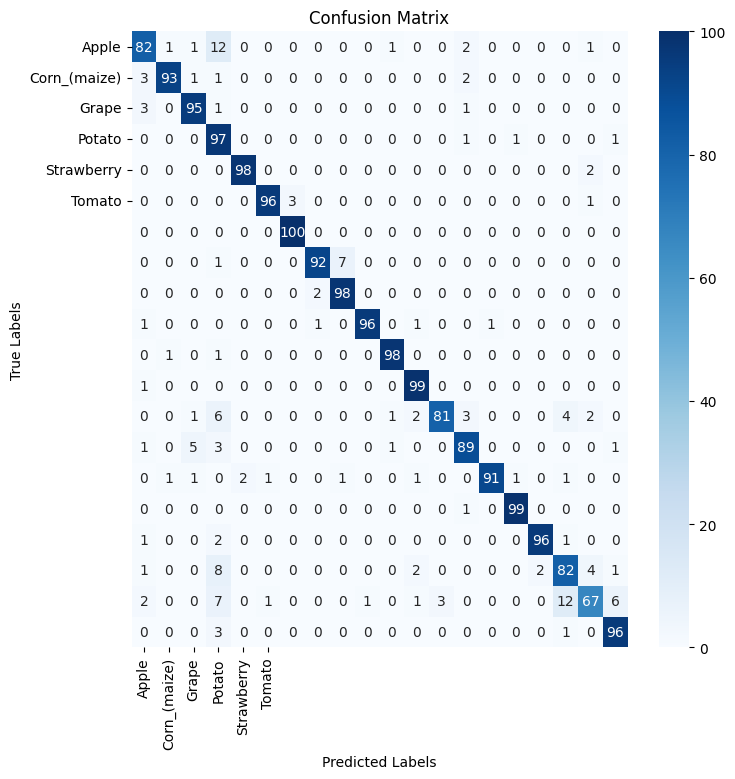

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions1, predictions2 = model.predict(test_array)
predicted_labels = np.argmax(predictions2, axis=1)
print(predicted_labels)
true_labels = test_task2_for_confusion  # True labels for the test dataset
cm = confusion_matrix(true_labels, predicted_labels)

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Assuming you have already computed the confusion matrix 'cm'
class_names = plant_labels # Replace with your actual class names
plot_confusion_matrix(cm, class_names)

In [ ]:
print_file = '../drive/MyDrive/AI/models/4june_mtl_inception_frozen'
history = model_history
for key in history.history.keys():
  file_name = print_file + "/" + key + '.txt'
  with open(file_name, 'w') as f:
    for val in history.history[key]:
      print(val, file=f)
  with open(print_file + 'evaluation.txt', 'w') as f:
    for val in history.history[key]:
      print(val, file=f)


model.save('../drive/MyDrive/AI/models/4june_mtl_inception_frozen/model.h5')

In [ ]:
# model.save('../drive/MyDrive/AI/models/25march_mtl/model.h5')

# PLOT

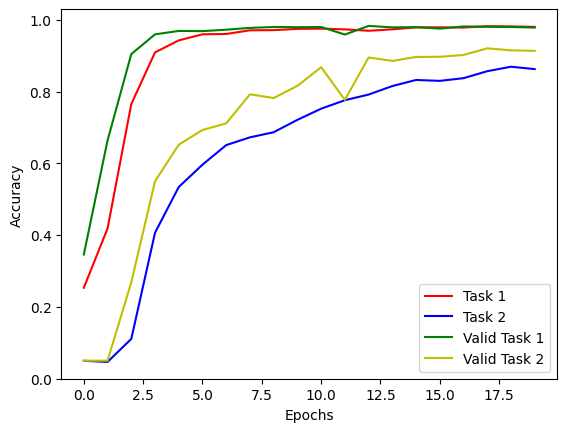

In [ ]:
    plt.plot(range(len(model_history.history['task_1_output_accuracy'])), model_history.history['task_1_output_accuracy'], c='r', label='Task 1')
    plt.plot(range(len(model_history.history['task_2_output_accuracy'])), model_history.history['task_2_output_accuracy'], c='b', label='Task 2')
    plt.plot(range(len(model_history.history['val_task_1_output_accuracy'])), model_history.history['val_task_1_output_accuracy'], c='g', label='Valid Task 1')
    plt.plot(range(len(model_history.history['val_task_2_output_accuracy'])), model_history.history['val_task_2_output_accuracy'], c='y', label='Valid Task 2')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

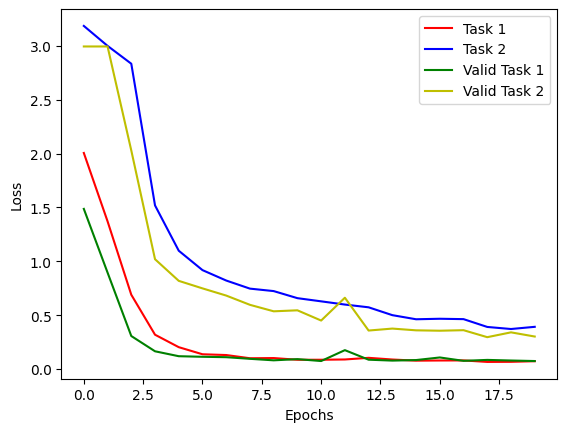

In [ ]:
  plt.plot(range(len(model_history.history['task_1_output_loss'])), model_history.history['task_1_output_loss'], c='r', label='Task 1')
  plt.plot(range(len(model_history.history['task_2_output_loss'])), model_history.history['task_2_output_loss'], c='b', label='Task 2')
  plt.plot(range(len(model_history.history['val_task_1_output_loss'])), model_history.history['val_task_1_output_loss'], c='g', label='Valid Task 1')
  plt.plot(range(len(model_history.history['val_task_2_output_loss'])), model_history.history['val_task_2_output_loss'], c='y', label='Valid Task 2')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

# TEST

In [ ]:
ls -l

total 12
drwxrwxrwx 4 root root 4096 Mar  5 16:48 classes/
drwxrwxrwx 4 root root 4096 Mar  5 17:09 diseases/
drwxrwxrwx 3 root root 4096 Mar  5 16:45 test/


In [ ]:
ls -l

total 20
drwxrwxrwx 4 root root 4096 Mar  5 16:48 classes/
drwxrwxrwx 5 root root 4096 Mar 25 11:14 dataset/
drwxrwxrwx 4 root root 4096 Mar  5 17:09 diseases/
drwxr-xr-x 2 root root 4096 Mar 25 11:14 __MACOSX/
drwxrwxrwx 3 root root 4096 Mar  5 16:45 test/


In [ ]:
ls -l

total 12
drwxrwxrwx 4 root root 4096 Mar  5 16:48 classes/
drwxrwxrwx 4 root root 4096 Mar  5 17:09 diseases/
drwxrwxrwx 3 root root 4096 Mar  5 16:45 test/


In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import os

test_dir = './dataset/test/test'
# model = load_model('../drive/MyDrive/AI/models/25march_mtl/model.h5')

images_paths = []
for _, _, photos in os.walk(test_dir):
    for i in range(0, len(photos)):
        img = Image.open(os.path.join(test_dir, photos[i]))
        img = img.resize((224, 224))
        img_array = np.array(img)

        # Preprocess the image
        img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
        # Get the model's prediction for the image
        prediction1, prediction2 = model.predict(img_array)
        # print(prediction)
        # # Print the predicted class
        predicted_output1 = np.argmax(prediction1)
        predicted_output2 = np.argmax(prediction2)
        predicted_class_name1 = list(plant_labels_dict.keys())[predicted_output1]
        predicted_class_name2 = list(diseases_labels_dict.keys())[predicted_output2]

        print(f'Image: {photos[i]} / Predicted classes: {predicted_class_name1}, {predicted_class_name2}')


1/1 [==============================] - 0s 208ms/step
Image: TomatoEarlyBlight5.JPG / Predicted classes: Tomato, Tomato___Early_blight
1/1 [==============================] - 0s 19ms/step
Image: TomatoYellowCurlVirus2.JPG / Predicted classes: Tomato, Tomato___Tomato_Yellow_Leaf_Curl_Virus
1/1 [==============================] - 0s 18ms/step
Image: AppleCedarRust3.JPG / Predicted classes: Apple, Apple___Cedar_apple_rust
1/1 [==============================] - 0s 17ms/step
Image: PotatoEarlyBlight3.JPG / Predicted classes: Potato, Potato___Early_blight
1/1 [==============================] - 0s 18ms/step
Image: CornCommonRust1.JPG / Predicted classes: Corn_(maize), Corn_(maize)___Common_rust_
1/1 [==============================] - 0s 18ms/step
Image: CornCommonRust3.JPG / Predicted classes: Corn_(maize), Corn_(maize)___Common_rust_
1/1 [==============================] - 0s 22ms/step
Image: PotatoHealthy2.JPG / Predicted classes: Potato, Potato___healthy
1/1 [==============================] - 

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
import os
from PIL import Image

root_dir = "./diseases"
print("starting...")
plant_labels = ['Apple', 'Corn_(maize)', 'Grape', 'Potato', 'Strawberry', 'Tomato']
diseases_labels = ['Apple___Apple_scab', 'Apple___Cedar_apple_rust',
                   'Apple___healthy', 'Corn_(maize)___Common_rust_',
                   'Corn_(maize)___Northern_Leaf_Blight',
                   'Grape___Black_rot', 'Grape___healthy',
                   'Potato___Early_blight', 'Potato___Late_blight',
                   'Strawberry___healthy', 'Tomato___Bacterial_spot',
                   'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___healthy']

plant_labels_dict = {}
diseases_labels_dict = {}
for index, key in enumerate(plant_labels):
    plant_labels_dict[key] = index
for index, key in enumerate(diseases_labels):
    diseases_labels_dict[key] = index

test_array = np.empty((193, 224, 224, 3), dtype=np.uint8)
test_task_1_labels_array = np.empty((193, 1), dtype=np.uint8)
test_task_2_labels_array = np.empty((193, 1), dtype=np.uint8)
j = 0
for dirpath, _, _ in os.walk(root_dir, "test"):
    if dirpath.find("test/") == -1:
        continue

    disease = dirpath.split("test/")[1]
    plant = disease.split("___")[0]
    for _, _, photos in os.walk(dirpath):
        for i in range(0, len(photos)):
            img = Image.open(os.path.join(dirpath, photos[i]))
            img = img.convert("RGB")
            img = img.resize((224, 224))
            # print(os.path.join(dirpath, photos[i]))
            test_array[j] = np.array(img)
            test_task_1_labels_array[j] = plant_labels_dict[plant]
            test_task_2_labels_array[j] = diseases_labels_dict[disease]
            j += 1

test_task1_for_confusion = test_task_1_labels_array
test_task2_for_confusion = test_task_2_labels_array
print(test_task_1_labels_array.shape)
print(test_task_2_labels_array.shape)
test_task_1_labels_array = to_categorical(test_task_1_labels_array, 6)
test_task_2_labels_array = to_categorical(test_task_2_labels_array, 20)
print(test_task_1_labels_array.shape)
print(test_task_2_labels_array.shape)

# model = load_model('../drive/MyDrive/AI/models/4june_mtl_inception_frozen/model.h5')
values = model.evaluate(test_array, {'task_1_output': test_task_1_labels_array, 'task_2_output': test_task_2_labels_array})


starting...
(193, 1)
(193, 1)
(193, 6)
(193, 20)
7/7 [==============================] - 0s 63ms/step - loss: 13.7616 - task_1_output_loss: 1.4495 - task_2_output_loss: 12.3121 - task_1_output_recall: 0.7202 - task_2_output_recall_1: 0.0570


In [ ]:
pwd

'/content/balanced_dataset'

In [ ]:
cd plantdoc_dataset

/content/balanced_dataset/plantdoc_dataset
